# Import

In [1]:
import tensorflow as tf
import mtcnn
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
from PIL import Image

# Functions

In [2]:
def face_from_coordinates(img,x,y,w,h):
    return img[y:y+h,x:x+w]

# Code

Shape of image/array: (1396, 1074, 3)


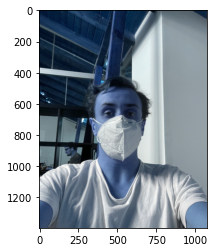

In [3]:
# load image from file
filename = '/Users/emanuelmuller/code/marchigginsberlin/face_mask_detection/raw_data/cropping/3.png'
pixels = cv2.imread(filename) #format='jpeg')
#pixels = pixels[:,:,:3]
#pixels = pixels * 255 # reverse normalization
print("Shape of image/array:",pixels.shape)
imgplot = plt.imshow(pixels)
plt.show()

In [4]:
pixels = cv2.imread(filename)

In [21]:
detector = mtcnn.MTCNN(steps_threshold=[0.8, 0.8, 0.8])

In [27]:
faces= detector.detect_faces(pixels)
faces

[{'box': [367, 535, 289, 364],
  'confidence': 0.9109911918640137,
  'keypoints': {'left_eye': (423, 663),
   'right_eye': (559, 663),
   'nose': (469, 749),
   'mouth_left': (428, 838),
   'mouth_right': (529, 834)}}]

In [28]:
converted_faces = {}

for face, value in enumerate(faces):
    i = 1
    converted_faces[f"face{i}"] = faces[0]["box"]
converted_faces

{'face1': [367, 535, 289, 364]}

In [24]:
encoded_faces = {}

for index, face in enumerate(faces):
    
    encoded_faces[f"face{index + 1}"] = face_from_coordinates(pixels, *face['box'])


In [25]:
encoded_faces

{'face1': array([[[ 17,  26,  41],
         [ 14,  24,  39],
         [ 23,  33,  48],
         ...,
         [ 46,  53,  56],
         [ 46,  55,  56],
         [ 53,  63,  63]],
 
        [[ 21,  32,  47],
         [ 18,  29,  43],
         [ 27,  38,  53],
         ...,
         [ 41,  48,  51],
         [ 50,  59,  59],
         [ 62,  71,  72]],
 
        [[ 30,  41,  56],
         [ 33,  44,  58],
         [ 29,  40,  54],
         ...,
         [ 34,  41,  43],
         [ 44,  51,  52],
         [ 51,  59,  60]],
 
        ...,
 
        [[  3,   9,  18],
         [  0,   3,  16],
         [ 31,  44,  63],
         ...,
         [217, 223, 222],
         [220, 226, 225],
         [220, 227, 226]],
 
        [[  1,   6,  15],
         [ 11,  16,  30],
         [ 34,  47,  70],
         ...,
         [218, 225, 223],
         [217, 223, 222],
         [219, 225, 224]],
 
        [[  4,  10,  20],
         [ 13,  16,  33],
         [ 29,  42,  69],
         ...,
         [220, 227,

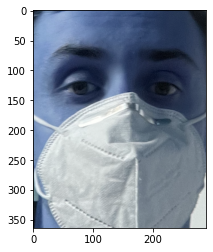

In [26]:
plt.imshow(encoded_faces['face1'])

In [ ]:
resized_faces_array = {}
i = 1
for face in encoded_faces.items():
    individual_face=encoded_faces[f'face{i}']
    image=Image.fromarray(individual_face)
    image = image.resize((128,128))
    resized_faces_array[f'face{i}'] = np.asarray(image)
    i = i + 1

In [41]:
path_mask = '../raw_data/Face_with_mask'
path_no_mask = '../raw_data/Face_no_Mask'

list_mask = os.listdir(path_mask)
list_mask.sort()

list_no_mask = os.listdir(path_no_mask)
list_no_mask.sort()

X_model_test = []
y_model_test = []

for i in range(0,150):
        c_path = os.path.join(path_mask, list_mask[i])
        X_model_test.append(plt.imread(c_path)[:, :, :])
        y_model_test.append(0) 
    



for i in range(0,150):
        c_path = os.path.join(path_no_mask, list_no_mask[i])
        X_model_test.append(plt.imread(c_path)[:, :, :])
        y_model_test.append(2) 
    

In [55]:
X_model_test[250].shape

(128, 128, 3)

In [ ]:
directory_no_mask = '../raw_data/Dataset/without_mask/'

no_mask_names = os.listdir(directory_no_mask)

no_mask_df = pd.DataFrame()
no_mask_df['file_name'] = no_mask_names
no_mask_df['file_name'] = directory_no_mask + no_mask_df['file_name']
no_mask_df['label'] = 0